In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


numpy kütüphanesi -> Matematiksel işlemler, arrays, RMSE hesaplaması için kullandım

pandas kütüphanesi -> Veri dönüştürme, filtreleme ve düzenleme işlemleri için kullandım

matplotlib.pyplot kütüphanesi -> Temel grafik oluşturma işlemleri için kullandım

seaborn kütüphanesi -> Daha gelişmiş ve estetik grafikler (histogram, scatter, boxplot) için kullandım

train_test_split fonksiyonu -> Veriyi eğitim ve test setlerine bölmek için kullandım

LinearRegression sınıfı -> Lineer regresyon modelini oluşturmak için kullandım

StandardScaler sınıfı -> Değişkenleri normalize etmek için kullandım

mean_absolute_error, mean_squared_error, r2_score fonksiyonları -> Model
performans metriklerini hesaplamak için kullandım

LabelEncoder sınıfı -> Kategorik değişkenleri sayısal değerlere dönüştürmek için kullandım

In [ ]:
# Pandas ayarları
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

Pandas ayarlarını yaparak tüm sütunların görünür olmasını sağlıyorum.


In [ ]:
#Veri Setinin Yüklenmesi
df = pd.read_csv("insurance.csv")
print("Veri Seti Başlık Bilgileri:")
print(df.head())

Veri Seti Başlık Bilgileri:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Bu bölümde gerekli kütüphaneleri içe aktarıyor ve veri setimizi yüklüyoruz. Sigorta maliyetlerini tahmin etmek için kullanacağımız "insurance.csv" dosyasını okuyup, veri setinin ilk 5 satırını görüntülüyorum

In [ ]:
#Veri Seti İstatistikleri
print("Veri Setinin İstatistiksel Özeti:")
print(df.describe())



Veri Setinin İstatistiksel Özeti:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Bu kod bloğunda veri setinin istatistiksel özetini görüyoruz. df.describe() fonksiyonu kullanarak veri setimizdeki sayısal sütunlar için temel istatistikleri hesapladık. Tabloda toplam kayıt sayısı, ortalama değerler, standart sapma, minimum değerler, çeyreklikler ve maksimum değerleri inceliyoruz. Veri setimizdeki ortalama yaş 39.2, ortalama BMI 30.6, ortalama çocuk sayısı 1.09 ve ortalama sigorta maliyeti 13270.42$ olarak karşımıza çıkıyor.

 Sigorta maliyetlerinin standart sapması 12110$ ile oldukça yüksek, bu da değerlerin geniş bir aralığa yayıldığını anlıyoruz.

# **Eksik Değer Analizi**

Bu bölümde veri setimizdeki her sütun için eksik değer sayısını kontrol ediyoruz. Eksik değerleri doldurma ya da silme işlemleri yaparak gideriyoruz.

Burada veri setindeki NaN değerleri kontrol ediyorum ve her sütundaki eksik değer sayısını hesaplıyorum.


In [ ]:
# Eksik değerlerin kontrolü
print("\nEksik Değer Analizi:")
missing_values = df.isnull().sum()
print(missing_values)



Eksik Değer Analizi:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Şüpheli değerler (0 veya negatif):
{'bmi': 0, 'age': 0, 'charges': 0}

Veri setinde eksik veya şüpheli değer bulunmamaktadır.


In [ ]:
# Gizli eksik değerlerin kontrolü (örn: BMI için 0 değerler)
suspicious_values = {
    'bmi': len(df[df['bmi'] <= 0]),
    'age': len(df[df['age'] <= 0]),
    'charges': len(df[df['charges'] <= 0])
}

Burada BMI, yaş ve sigorta ücreti için  0 veya negatif değerleri tespit ediyorum.


In [ ]:
# Eksik veya şüpheli değer varsa müdahale
if missing_values.sum() > 0 or sum(suspicious_values.values()) > 0:
    df_clean = df.copy()

Eğer eksik veya şüpheli değer varsa, orijinal veri setinin bir kopyasını oluşturuyorum.


In [ ]:
# NaN değerleri doldurma
for col in df.columns:
    if missing_values[col] > 0:
        if col in ['age', 'bmi', 'charges']:
            df_clean[col].fillna(df_clean[col].mean(), inplace=True)
        elif col == 'children':
            df_clean[col].fillna(0, inplace=True)
        else:  # Kategorik değişkenler
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

Sayısal değişkenlerdeki eksik değerleri ortalama ile, çocuk sayısını 0 ile, kategorik değişkenleri en sık değer (mod) ile dolduruyorum.


In [ ]:
if suspicious_values['bmi'] > 0:
    df_clean.loc[df_clean['bmi'] <= 0, 'bmi'] = df_clean[df_clean['bmi'] > 0]['bmi'].mean()
    print("\nEksik ve şüpheli değerler düzeltildi.")
    df = df_clean  # Temizlenmiş veri setini kullan
else:
    print("\nVeri setinde eksik veya şüpheli değer bulunmamaktadır.")


Veri setinde eksik veya şüpheli değer bulunmamaktadır.


Bu kod bloğunda, BMI değeri 0 veya negatif olan kayıtları kontrol ediyorum, böyle değerler varsa onları ortalama BMI değeriyle değiştiriyorum ve temizlenmiş veri setini kullanıyorum. Eğer şüpheli BMI değerleri yoksa, kullanıcıya veri setinde eksik veya şüpheli değer bulunmadığını bildiriyorum.

# **Label Encoding**

 Bu bölümde "cinsiyet", "sigara içme durumu" ve "bölge" gibi kategorik değişkenleri, LabelEncoder kullanarak sayısal değerlere dönüştürüyoruz. Bu dönüşüm, kategorik değişkenleri 0, 1, 2... gibi tam sayılarla kodlar.

In [ ]:
#Kategorik Verilerin Sayısallaştırılması (Label Encoding)
print("\nKategorik Verilerin Sayısallaştırılması (Label Encoding):")
le = LabelEncoder()

df_label = df.copy()
df_label["sex_encoded"] = le.fit_transform(df_label["sex"])
df_label["smoker_encoded"] = le.fit_transform(df_label["smoker"])
df_label["region_encoded"] = le.fit_transform(df_label["region"])

print("Label Encoding sonrası veri seti:")
print(df_label.head())


Kategorik Verilerin Sayısallaştırılması (Label Encoding):
Label Encoding sonrası veri seti:
   age     sex     bmi  children smoker     region      charges  sex_encoded  smoker_encoded  region_encoded
0   19  female  27.900         0    yes  southwest  16884.92400            0               1               3
1   18    male  33.770         1     no  southeast   1725.55230            1               0               2
2   28    male  33.000         3     no  southeast   4449.46200            1               0               2
3   33    male  22.705         0     no  northwest  21984.47061            1               0               1
4   32    male  28.880         0     no  northwest   3866.85520            1               0               1


# **One-Hot Encoding**

One-Hot Encoding kullanarak her bir kategori için ayrı bir sütun oluşturdum. Bu yöntemle, örneğin "erkek" yerine "sex_male" sütununda 1 değeri görüyoruz. Tabloda sigara içenler "smoker_yes" sütununda True değeri alırken, bölgeler için "region_northwest", "region_southeast" gibi ayrı sütunlarda True/False değerleri bulunuyor. "drop_first=True" parametresiyle her kategoriden bir seçeneği düşürerek çoklu bağlantı sorununu engellemiş oldum.

In [ ]:
#Kategorik Verilerin Sayısallaştırılması (One-Hot Encoding)
print("\nKategorik Verilerin Sayısallaştırılması (One-Hot Encoding):")
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
print("One-Hot Encoding sonrası veri seti:")
print(df_encoded.head())


Kategorik Verilerin Sayısallaştırılması (One-Hot Encoding):
One-Hot Encoding sonrası veri seti:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0   19  27.900         0  16884.92400     False        True             False             False              True
1   18  33.770         1   1725.55230      True       False             False              True             False
2   28  33.000         3   4449.46200      True       False             False              True             False
3   33  22.705         0  21984.47061      True       False              True             False             False
4   32  28.880         0   3866.85520      True       False              True             False             False


# **Aykırı Değer Kontrolü**

Bu bölümde, çeyrekler arası aralık (IQR) yöntemini kullanarak sayısal değişkenlerdeki aykırı değerleri tespit ediyoruz. Her değişken için alt ve üst sınırları hesaplayıp, bu sınırların dışında kalan değerleri aykırı değer olarak işaretliyoruz. IQR yöntemi, verilerin dağılımından bağımsız olarak çalıştığı için güvenilir bir aykırı değer tespit yöntemidir.

In [ ]:
#Aykırı Değer Kontrolü
print("\nAykırı Değer Analizi:")

# Sayısal değişkenleri belirleme
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
num_cols = [col for col in num_cols if col != "children"]

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n{col} değişkeni için aykırı değer analizi:")
    print(f"Alt sınır: {lower_bound}")
    print(f"Üst sınır: {upper_bound}")
    print(f"Aykırı değer sayısı: {len(outliers)}")



Aykırı Değer Analizi:

age değişkeni için aykırı değer analizi:
Alt sınır: -9.0
Üst sınır: 87.0
Aykırı değer sayısı: 0

bmi değişkeni için aykırı değer analizi:
Alt sınır: 13.7
Üst sınır: 47.290000000000006
Aykırı değer sayısı: 9

charges değişkeni için aykırı değer analizi:
Alt sınır: -13109.1508975
Üst sınır: 34489.350562499996
Aykırı değer sayısı: 139


# **Veri Görselleştirme**

Sigorta maliyetlerinin dağılımını gösterir. Dağılımın şekli, ortalama değerler ve aykırı değerler hakkında bilgi verir.

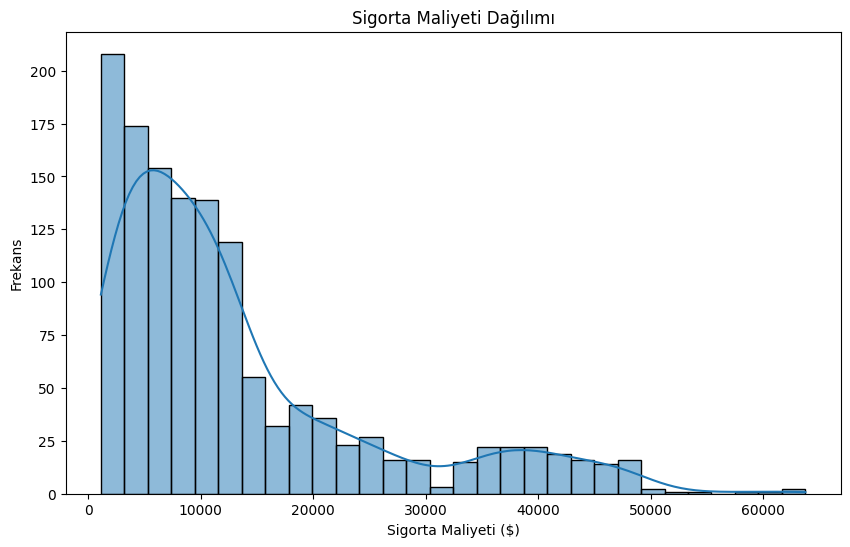

In [ ]:
#Veri Görselleştirme - 3 Farklı Tür
# 1. Görselleştirme: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["charges"], kde=True, bins=30)
plt.title("Sigorta Maliyeti Dağılımı")
plt.xlabel("Sigorta Maliyeti ($)")
plt.ylabel("Frekans")
plt.show()

Sigorta maliyeti dağılımı grafiğine baktığımızda en çok kişinin 0-5.000 aralığında sigorta maliyetine sahip olduğunu görüyoruz. 5.000-15.000$ arasında da önemli bir yoğunluk bulunmakta.

20.000$ üzerindeki sigorta maliyetlerinin sayısı oldukça az görünüyor ve

30.000-45.000$ arasında küçük bir yoğunlaşma olduğu dikkat çekiyor.RetryClaude can make mistakes.

Text(0, 0.5, 'Sigorta Maliyeti ($)')

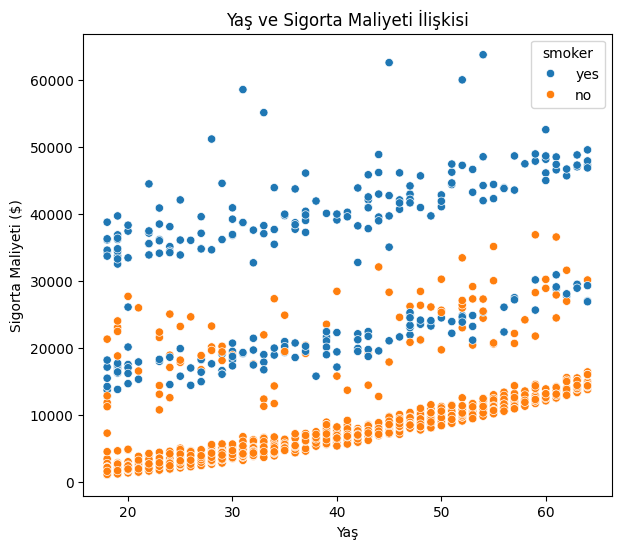

In [ ]:
# 2. Görselleştirme: Saçılım Grafikleri
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Yaş ve Sigorta Maliyeti İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Sigorta Maliyeti ($)")

Yaş ve sigorta maliyeti ilişkisi grafiğine baktığımızda, yaş arttıkça sigorta maliyetlerinin de arttığını görüyoruz. Ancak grafikte en belirgin ayrım sigara içenler (mavi nokta) ve içmeyenler (turuncu nokta) arasında. Sigara içenlerin sigorta maliyetleri, her yaş grubunda içmeyenlere göre belirgin şekilde daha yüksek. Özellikle 40 yaş üstü sigara içenlerde maliyetler 30.000-60.000$ aralığına çıkarken,

sigara içmeyenlerde bu değer genellikle 15.000$ altında kalıyor. Yaşa bağlı artış trendi her iki grupta da görülmekte, ancak sigara faktörü maliyeti çok daha fazla etkilemektedir.

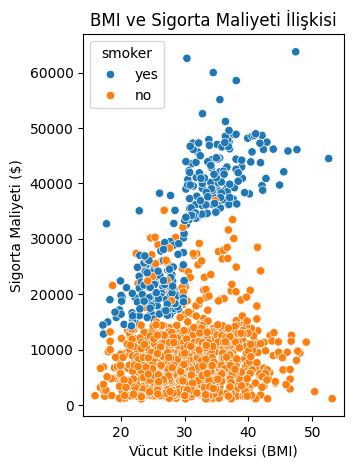

In [ ]:
#BMI(Vücut Kitle Endeksi) ve Sigorta Maliyeti Arasındaki İlişki
plt.subplot(1, 2, 2)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.title("BMI ve Sigorta Maliyeti İlişkisi")
plt.xlabel("Vücut Kitle İndeksi (BMI)")
plt.ylabel("Sigorta Maliyeti ($)")
plt.tight_layout()
plt.show()


BMI ve sigorta maliyeti ilişkisi grafiğine baktığımızda, BMI değeri arttıkça sigorta maliyetlerinde bir artış eğilimi görüyoruz. Ancak burada da en belirgin ayrım sigara içenler (mavi nokta) ve içmeyenler (turuncu nokta) arasında. Sigara içenlerin sigorta maliyetleri her BMI seviyesinde belirgin şekilde daha yüksek, özellikle 30-40 BMI aralığındaki sigara içenlerde maliyet 35.000-50.000$ seviyelerine çıkarken,

aynı BMI değerine sahip sigara içmeyenlerde bu değer genellikle 15.000$ civarında. Sigara içmeyen grupta BMI artışının maliyet üzerindeki etkisi sınırlıyken, sigara içen grupta BMI artışı maliyeti daha belirgin şekilde yükseltiyor.

Text(0, 0.5, 'Sigorta Maliyeti ($)')

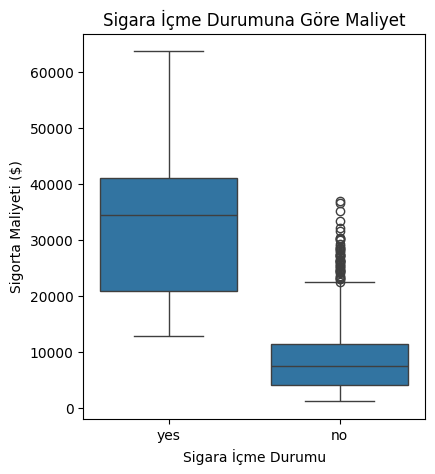

In [ ]:
# 3. Görselleştirme: Kutu Grafikleri
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Sigara İçme Durumuna Göre Maliyet")
plt.xlabel("Sigara İçme Durumu")
plt.ylabel("Sigorta Maliyeti ($)")

Sigara içme durumuna göre maliyet grafiğine baktığımızda, sigara içenler (yes) ve içmeyenler (no) arasında çok belirgin bir fark görüyoruz. Sigara içenlerin ortanca sigorta maliyeti yaklaşık 35.000 civarındayken, içmeyenlerin ortanca maliyeti 8.000-9.000 civarında. Sigara içenlerin sigorta maliyetleri 13.000-65.000$ aralığında geniş bir dağılım gösterirken,

içmeyenlerin maliyetleri genellikle 1.000-15.000$ aralığında yoğunlaşıyor. İçmeyenlerde görülen aykırı değerler, muhtemelen diğer risk faktörlerine sahip olan kişileri gösteriyor. Bu grafik, sigara içmenin sigorta maliyetini 3-4 kat artırabileceğini açıkça ortaya koyuyor.

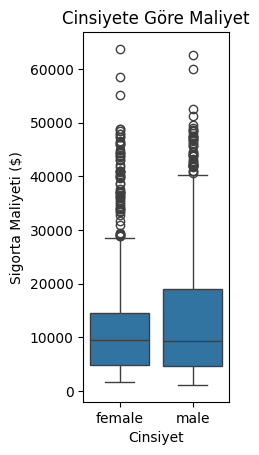

In [ ]:
#Cinsiyete göre maliyet
plt.subplot(1, 3, 2)
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Cinsiyete Göre Maliyet")
plt.xlabel("Cinsiyet")
plt.ylabel("Sigorta Maliyeti ($)")
plt.show()

Cinsiyete göre maliyet grafiğine baktığımızda, kadınlar (female) ve erkekler (male) arasında belirgin bir fark olmadığını görüyoruz. Erkeklerin ortanca sigorta maliyeti yaklaşık 9.000$ civarındayken,

 kadınların ortanca maliyeti yaklaşık 8.000$ civarında.

Her iki cinsiyet grubunda da 30.000-60.000$ aralığında yüksek maliyetli aykırı değerler bulunuyor. Bu aykırı değerler muhtemelen sigara içen veya diğer risk faktörlerine sahip bireyleri temsil ediyor. Kutu grafiğindeki dağılım, sigorta maliyetlerinin belirlenmesinde cinsiyetin, sigara kullanımı kadar belirleyici bir faktör olmadığını gösteriyor.

# **Lineer Regresyon Modeli Kurma ve Eğitim**

Bu bölümde, Lineer Regresyon modeli oluşturup eğitiyoruz

LinearRegression() sınıfını kullanarak bir model nesnesi oluşturuyoruz.

In [ ]:
#Lineer Regresyon Modeli Kurma ve Eğitim
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

Ölçeklendirilmiş eğitim verilerimizle modeli eğitiyoruz

In [ ]:
# Model katsayıları
print("\nModel katsayıları:")
print(f"Sabit terim (intercept): {model.intercept_}")
print("Değişken katsayıları:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"- {feature}: {coef}")

# Tahminler yapma
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)



Model katsayıları:
Sabit terim (intercept): 13379.157306773504
Değişken katsayıları:
- age: 3688.5831899798695
- bmi: 2090.997834067106
- children: 514.0236035634014
- sex_male: 52.388681208776084
- smoker_yes: 9595.868167498633
- region_northwest: -209.32555139392053
- region_southeast: -426.26277108976
- region_southwest: -394.0144493630948


Eğitim sonrasında, sabit terim (intercept) ve her değişkenin katsayılarını inceliyoruz. Bu katsayılar, her değişkenin sigorta maliyeti üzerindeki etkisini gösterir. Örneğin, "smoker_yes" değişkeninin katsayısı yüksekse, sigara içmenin sigorta maliyetini önemli ölçüde artırdığı anlamına gelir.

Test seti üzerinde tahminler yapıp, gerçek ve tahmin edilen değerleri karşılaştırıyoruz.


Regresyon Sonuçları Grafiği:


Text(0.5, 1.0, 'Gerçek vs Tahmin Edilen Sigorta Maliyetleri')

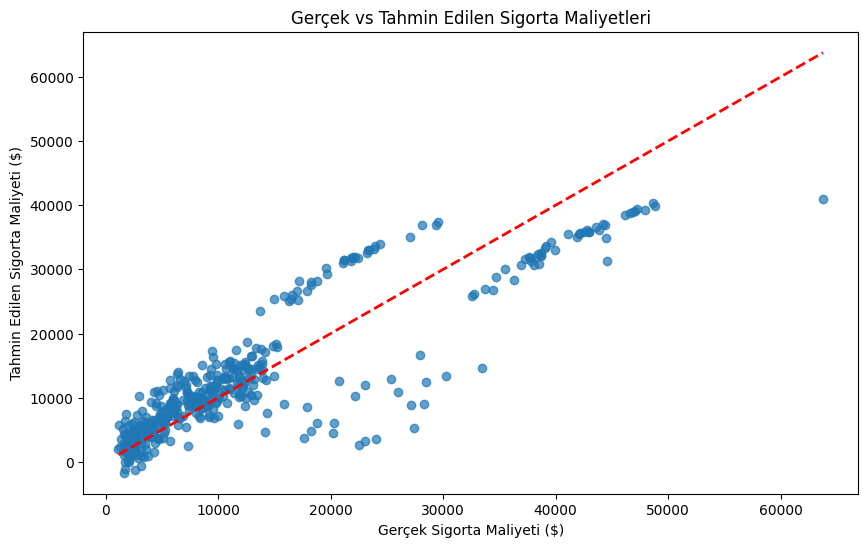

In [ ]:
print("\nRegresyon Sonuçları Grafiği:")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Sigorta Maliyeti ($)')
plt.ylabel('Tahmin Edilen Sigorta Maliyeti ($)')
plt.title('Gerçek vs Tahmin Edilen Sigorta Maliyetleri')

Regresyon modeli düşük maliyetli poliçeleri iyi tahmin ederken, yüksek maliyetli poliçelerde tahmin performansı düşmekte, bu da modelin iyileştirilmesi için yüksek maliyetli poliçeleri etkileyen faktörlere daha fazla odaklanılması gerektiğini göstermektedir.

Model performansını değerlendirmek için çeşitli metrikler kullanıyoruz:

MAE (ortalama mutlak hata), MSE (ortalama kare hata), RMSE (kök ortalama kare hata) ve R2 (determinasyon katsayısı). Metrikler hem eğitim hem test veri seti için ayrı ayrı hesaplanarak modelin tahmin başarısını ölçmektedir.

In [ ]:
#Model Performans Metrikleri
# Metrikleri hesaplama
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Eğitim seti metrikleri
print("\nEğitim Seti Metrikleri:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R2: {train_r2}")


Eğitim Seti Metrikleri:
MAE: 4251.255798614485
MSE: 37730549.723577656
RMSE: 6142.519818737067
R2: 0.7423980090600258


MAE -> Tahminlerin gerçek değerlerden ortalama sapma miktarı

MSE -> Hataların karelerinin ortalaması, büyük hataları daha belirgin şekilde yansıtan değer

RMSE -> MSE'nin karekökü, orijinal birimde (dolar) ifade edilir

R2 -> Modelin veri setindeki varyasyonu açıklama oranı, 1'e yaklaştıkça daha iyi model

In [ ]:
# Test seti metrikleri
print("\nTest Seti Metrikleri:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R2: {test_r2}")


Test Seti Metrikleri:
MAE: 4145.450555627599
MSE: 33780509.574791655
RMSE: 5812.100272258872
R2: 0.769611805436901


Eğitim ve test seti metriklerini karşılaştırdığımızda, modelimizin test setinde daha iyi performans gösterdiğini görüyoruz.

Test setinde MAE değeri 4145$ iken eğitim setinde 4251.

Aynı şekilde MSE ve RMSE değerlerinin de test setinde daha düşük olduğunu fark ediyoruz.  

R2 değeri test setinde 0.77, eğitim setinde 0.74 olarak ölçülmüş. Bu sonuçlar bize modelimizin genelleme yeteneğinin iyi olduğunu ve aşırı öğrenme problemi yaşamadığını gösteriyor.

YOUTUBE LİNK :
https://youtu.be/VLP0nnyEBcE